In [1]:
## Import cell
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy.testing as npt
import Omelyan_SST_Solver as SST

The point of this notebook is to visualize the accessible phase space for several Henon-Heiles orbits (systems with $E \leq \frac{1}{6}$ as shown in Explore_HH_Potential.ipynb). Visualizing a 4D (2 coordinates + 2 momenta) phase space graphically is a bit difficult, but by far the most common method of doing so for the Henon-Heiles system is with a Poincare section. A Poincare section for the Henon-Heiles Potential is most often obtained by plotting the point ($y(t)$, $p_y(t)$) every time the orbit crosses $x = 0$ over the course of its trajectory (see e.g. Zotos 2015, Skokos & Manos 2016, and https://mathworld.wolfram.com/Henon-HeilesEquation.html).

I implemented this procedure for several initial conditions that I studied the chaotic vs. ordered behavior of in Classifying_Chaotic_Orbits.ipynb

In [2]:
def orbit_cross_zero(x):
    """
    Given a numerical trajectory as a function of time, find all the times where the particle crosses x=0.
    
    Inputs:
        - x: numerical solution to a particle trajectory (numpy array)

    Returns:
        - just_before_x_cross_0, just_after_x_cross_0: Boolean arrays that list the points (times) in the trajectory right 
          before and right after the particle crosses x=0 (numpy arrays, same length as x)
    
    """
    
    x_sign = np.sign(x) # +1 if x>0, -1 if x<0, 0 if x=0
    # I'll make sure x isn't EXACTLY zero anywhere except at time 0.
    # important because it would overcount number of crossings because np.sign can be 1, -1, OR 0
    if x[0] != 0:
        assert np.size(x_sign[x_sign == 0]) == 0 
    elif x[0] == 0:
        assert np.size(x_sign[x_sign == 0]) == 1

    just_after_x_cross_0 = (np.roll(x_sign, 1) - x_sign) != 0 # makes an array that is True if x just changed signs
    just_after_x_cross_0[0] = False # ignore a sign change between x[0] and x[-1] (relic of np.roll wrapping all the way around)
    just_before_x_cross_0 = np.roll(just_after_x_cross_0, -1)
    
    return just_before_x_cross_0, just_after_x_cross_0

Text(0, 0.5, 'cos(t)')

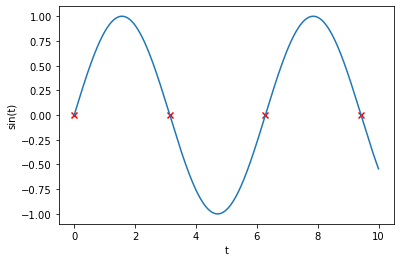

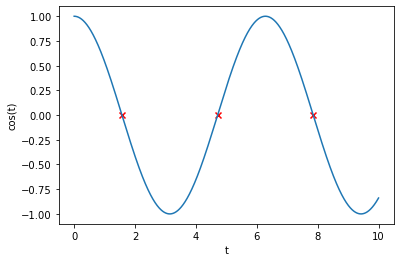

In [4]:
# Testing cell. Make sure the above function can see crossings of x=0 for simple trajectories: x = sin(t) & x = cos(t)
t = np.linspace(0, 10, 200000)
x1 = np.sin(t)
x2 = np.cos(t)

before_sine_cross_0, after_sine_cross_0 = orbit_cross_zero(x1)
before_cosine_cross_0, after_cosine_cross_0 = orbit_cross_zero(x2)

# average the position/time just before and after crossing zero (slightly better approximation than taking one or the other)
sine_is_0 = (x1[before_sine_cross_0] + x1[after_sine_cross_0]) / 2
times_sine_is_0 = (t[before_sine_cross_0] + t[after_sine_cross_0]) / 2
npt.assert_allclose(times_sine_is_0, [0, np.pi, 2*np.pi, 3*np.pi], rtol=1e-4, atol=1e-4)

cosine_is_0 = (x2[before_cosine_cross_0] + x2[after_cosine_cross_0]) / 2
times_cosine_is_0 = (t[before_cosine_cross_0] + t[after_cosine_cross_0]) / 2
npt.assert_allclose(times_cosine_is_0, [np.pi/2, 3/2*np.pi, 5/2*np.pi], rtol=1e-4, atol=1e-4)

plt.plot(t, x1)
plt.scatter(times_sine_is_0, sine_is_0, marker='x', color='r')
plt.xlabel('t')
plt.ylabel('sin(t)')

plt.figure()
plt.plot(t, x2)
plt.scatter(times_cosine_is_0, cosine_is_0, marker='x', color='r')
plt.xlabel('t')
plt.ylabel('cos(t)')

With this test successful, I will now implement the above function to create Poincare sections for several Henon-Heiles orbits. These initial conditions are just a few of the ordered and chaotic orbits from Classifying_Chaotic_Orbits.ipynb

Note: to keep computation time down for grading, I limited the number of time steps for each orbit in the cell below. I also ran the cell below for a much longer time to get a more filled out plot. I saved all of the resulting plots to the file Poincare_Sections.pdf so you can see them. To reproduce those plots, uncomment out the second line in the next cell (it took ~20-30 minutes to run on my machine for the long time set).

dt = 0.01000002000004


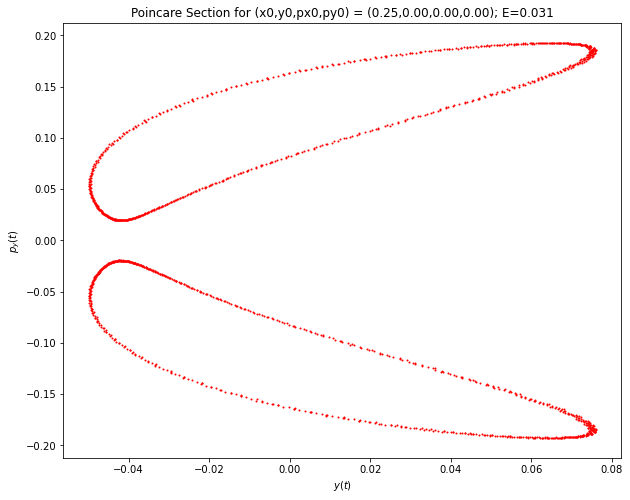

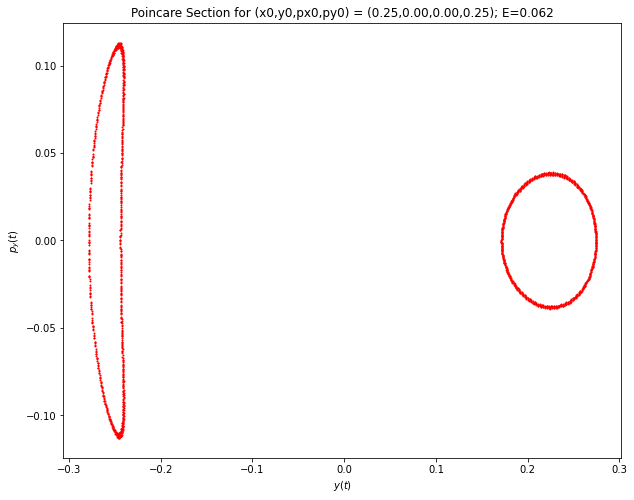

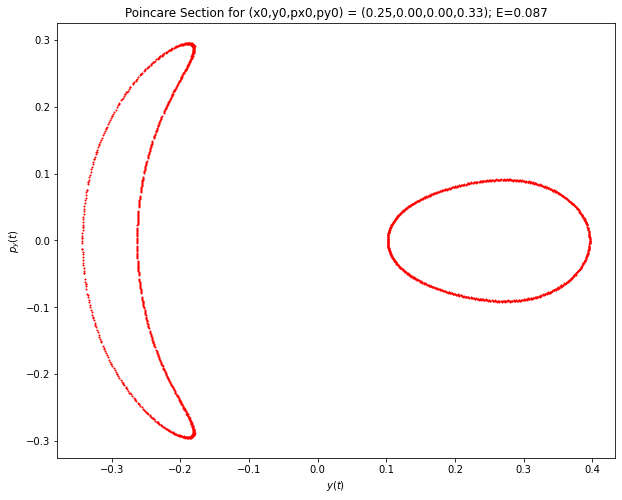

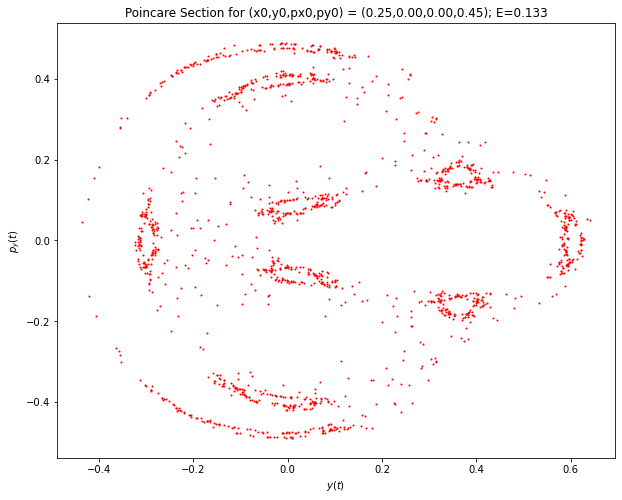

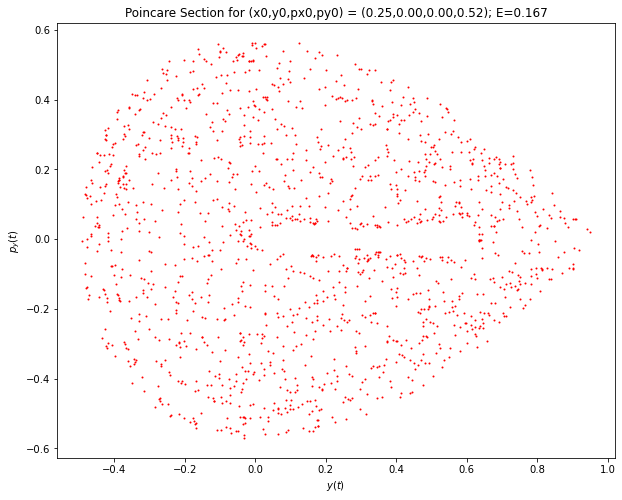

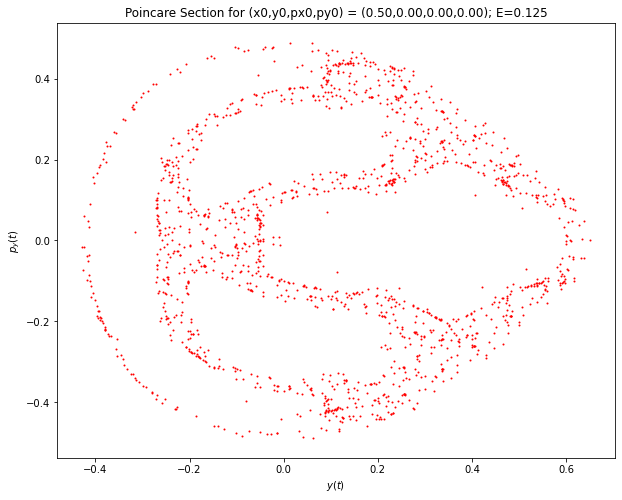

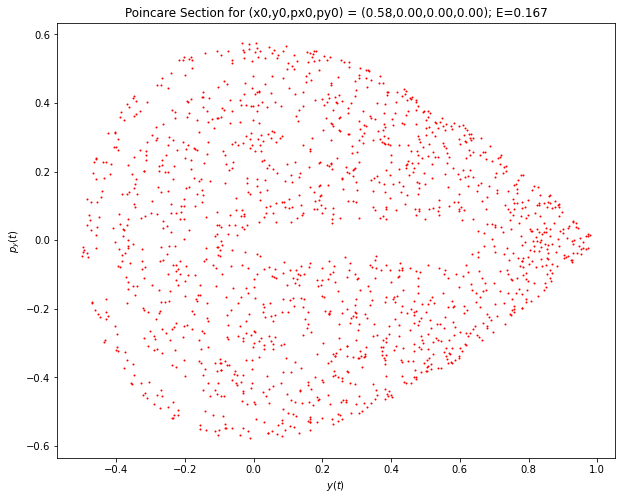

In [5]:
t = np.linspace(0, 5000, 500000)
#t = np.linspace(0, 100000, 10000000)
print('dt =', t[1]- t[0])

# x0, y0, px0, py0
initial_conditions = [[1/4, 0, 0, 0],
                      [1/4, 0, 0, 1/4],
                      [1/4, 0, 0, 1/3],
                      [1/4, 0, 0, 9/20],
                      [1/4, 0, 0, np.sqrt(13/48)], # max value of py0 for x0=1/4. Gives E = 1/6
                      [1/2, 0, 0, 0],
                      [1/np.sqrt(3), 0, 0, 0]] # max value of x0 allowed. Gives E = 1/6

for i in initial_conditions:
    x0, y0, px0, py0 = i[0], i[1], i[2], i[3]
    E = SST.E_HH(x0, y0, px0, py0)
    x, y, px, py = SST.solve(t, x0, y0, px0, py0, SST.dVHH_dx, SST.dVHH_dy)
    before, after = orbit_cross_zero(x)
    
    plt.figure(figsize=(10,8))
    # average y(t) and py(t) just before and just after x crosses 0
    plt.scatter((y[before] + y[after])/2, (py[before] + py[after])/2, s=1, color='r')
    plt.xlabel('$y(t)$')
    plt.ylabel('$p_y(t)$')
    plt.title('Poincare Section for (x0,y0,px0,py0) = (%.2f,%.2f,%.2f,%.2f); E=%.3f' % (x0, y0, px0, py0, E))